In [1]:
import pandas as pd
import numpy as np
import json
import glob
import tqdm
import seaborn as sns
import matplotlib.pylab as plt

import warnings
warnings.filterwarnings("ignore")

from model_drift import settings



In [2]:
label_cols = [
        "No Finding",
        "Edema",
        "Cardiomegaly",
        "Pleural Effusion",
        "Opacity",
        "Atelectasis",
        "Pleural Abnormalities",
        "Pneumonia",
        "Consolidation",
        "Lesion",
    ]

def converter(value):
    if isinstance(value, list):
        d = {label_cols[i]:vv for i, vv in enumerate(value)}
        return d
    return value

In [3]:
df = []

jsonl_dir = str(settings.TOP_DIR.joinpath("results", 'classifier', 'finetuned'))
jsonl_files = glob.glob(f"{jsonl_dir}/*.jsonl")

for fn in tqdm.tqdm_notebook(jsonl_files):
    with open(fn, 'r') as f:
        for line in tqdm.tqdm_notebook(f.readlines()):
            df.append({k: converter(v) for k, v in json.loads(line).items()})
print(len(df))
df = pd.json_normalize(df)
print(len(df))
df.head()

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/40205 [00:00<?, ?it/s]

  0%|          | 0/40205 [00:00<?, ?it/s]

  0%|          | 0/40205 [00:00<?, ?it/s]

  0%|          | 0/40204 [00:00<?, ?it/s]

160819
160819


,index,score.No Finding,score.Edema,score.Cardiomegaly,score.Pleural Effusion,score.Opacity,score.Atelectasis,score.Pleural Abnormalities,score.Pneumonia,score.Consolidation,...,activation.No Finding,activation.Edema,activation.Cardiomegaly,activation.Pleural Effusion,activation.Opacity,activation.Atelectasis,activation.Pleural Abnormalities,activation.Pneumonia,activation.Consolidation,activation.Lesion
0,20536686640136348236148679891455886468_k6ga29.png,-3.221914,-9.562931,0.198151,-4.758427,-3.175417,-2.785142,-1.227306,-4.715621,-6.063536,...,0.038349,7.028155e-05,0.549376,0.008506,0.040101,0.058132,0.226653,0.008875,0.002321,0.029256
1,113855343774216031107737439268243531979_3k951n...,-0.897817,-10.251114,-3.098645,-7.502988,-3.877130,-4.079744,-5.741298,-5.912987,-7.896447,...,0.289499,3.531689e-05,0.043163,0.000551,0.020290,0.016631,0.003200,0.002697,0.000372,0.016891
2,313723174271082992847610802266403640553-4_hhi4...,-5.682134,-14.645055,-4.623094,0.152122,0.859045,-2.138089,0.754930,-1.412256,-1.001147,...,0.003395,4.362479e-07,0.009727,0.537957,0.702461,0.105449,0.680252,0.195879,0.268716,0.005723
3,105529804483623054726294337265160703666_6zn76a...,-0.597147,-11.796655,-2.730703,-7.057621,-4.064648,-2.696711,-4.415497,-5.457584,-6.130983,...,0.354997,7.529649e-06,0.061186,0.000860,0.016879,0.063168,0.011944,0.004246,0.002170,0.010872
4,102185472428957491598043403159908631419_zb8kco...,-2.670287,-11.569566,-3.732254,-4.284808,-3.327652,-2.378380,-3.725797,-3.307613,-4.915821,...,0.064750,9.449250e-06,0.023379,0.013589,0.034635,0.084836,0.023527,0.035311,0.007276,0.008899


In [4]:
from model_drift.data.padchest import PadChest

pc = PadChest.from_csv()
pc.prepare()

ModuleNotFoundError: No module named 'data'

In [ ]:
list(pc.df)

['ImageID',
 'ImageDir',
 'StudyDate_DICOM',
 'StudyID',
 'PatientID',
 'PatientBirth',
 'PatientSex_DICOM',
 'ViewPosition_DICOM',
 'Projection',
 'MethodProjection',
 'Pediatric',
 'Modality_DICOM',
 'Manufacturer_DICOM',
 'PhotometricInterpretation_DICOM',
 'PixelRepresentation_DICOM',
 'PixelAspectRatio_DICOM',
 'SpatialResolution_DICOM',
 'BitsStored_DICOM',
 'WindowCenter_DICOM',
 'WindowWidth_DICOM',
 'Rows_DICOM',
 'Columns_DICOM',
 'XRayTubeCurrent_DICOM',
 'Exposure_DICOM',
 'ExposureInuAs_DICOM',
 'ExposureTime',
 'RelativeXRayExposure_DICOM',
 'ReportID',
 'Report',
 'MethodLabel',
 'Labels',
 'Localizations',
 'LabelsLocalizationsBySentence',
 'labelCUIS',
 'LocalizationsCUIS',
 'StudyDate',
 'Frontal',
 'age',
 'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Lesion',
 'No Finding',
 'Opacity',
 'Pleural Abnormalities',
 'Pleural Effusion',
 'Pneumonia']

In [ ]:
pc.merge(df, left_on="ImageID", right_on="index", how='inner')

In [6]:
pc_df_vae = pc.df.merge(df, left_on="ImageID", right_on="index", how='inner')

In [7]:
df.head()

,index,score.No Finding,score.Edema,score.Cardiomegaly,score.Pleural Effusion,score.Opacity,score.Atelectasis,score.Pleural Abnormalities,score.Pneumonia,score.Consolidation,...,activation.No Finding,activation.Edema,activation.Cardiomegaly,activation.Pleural Effusion,activation.Opacity,activation.Atelectasis,activation.Pleural Abnormalities,activation.Pneumonia,activation.Consolidation,activation.Lesion
0,20536686640136348236148679891455886468_k6ga29.png,-3.221914,-9.562931,0.198151,-4.758427,-3.175417,-2.785142,-1.227306,-4.715621,-6.063536,...,0.038349,7.028155e-05,0.549376,0.008506,0.040101,0.058132,0.226653,0.008875,0.002321,0.029256
1,113855343774216031107737439268243531979_3k951n...,-0.897817,-10.251114,-3.098645,-7.502988,-3.877130,-4.079744,-5.741298,-5.912987,-7.896447,...,0.289499,3.531689e-05,0.043163,0.000551,0.020290,0.016631,0.003200,0.002697,0.000372,0.016891
2,313723174271082992847610802266403640553-4_hhi4...,-5.682134,-14.645055,-4.623094,0.152122,0.859045,-2.138089,0.754930,-1.412256,-1.001147,...,0.003395,4.362479e-07,0.009727,0.537957,0.702461,0.105449,0.680252,0.195879,0.268716,0.005723
3,105529804483623054726294337265160703666_6zn76a...,-0.597147,-11.796655,-2.730703,-7.057621,-4.064648,-2.696711,-4.415497,-5.457584,-6.130983,...,0.354997,7.529649e-06,0.061186,0.000860,0.016879,0.063168,0.011944,0.004246,0.002170,0.010872
4,102185472428957491598043403159908631419_zb8kco...,-2.670287,-11.569566,-3.732254,-4.284808,-3.327652,-2.378380,-3.725797,-3.307613,-4.915821,...,0.064750,9.449250e-06,0.023379,0.013589,0.034635,0.084836,0.023527,0.035311,0.007276,0.008899


In [8]:
cols = [c for c in list(pc_df_vae) if c.startswith("activation.") and 'all' not in c]
cols

['activation.No Finding',
 'activation.Edema',
 'activation.Cardiomegaly',
 'activation.Pleural Effusion',
 'activation.Opacity',
 'activation.Atelectasis',
 'activation.Pleural Abnormalities',
 'activation.Pneumonia',
 'activation.Consolidation',
 'activation.Lesion']

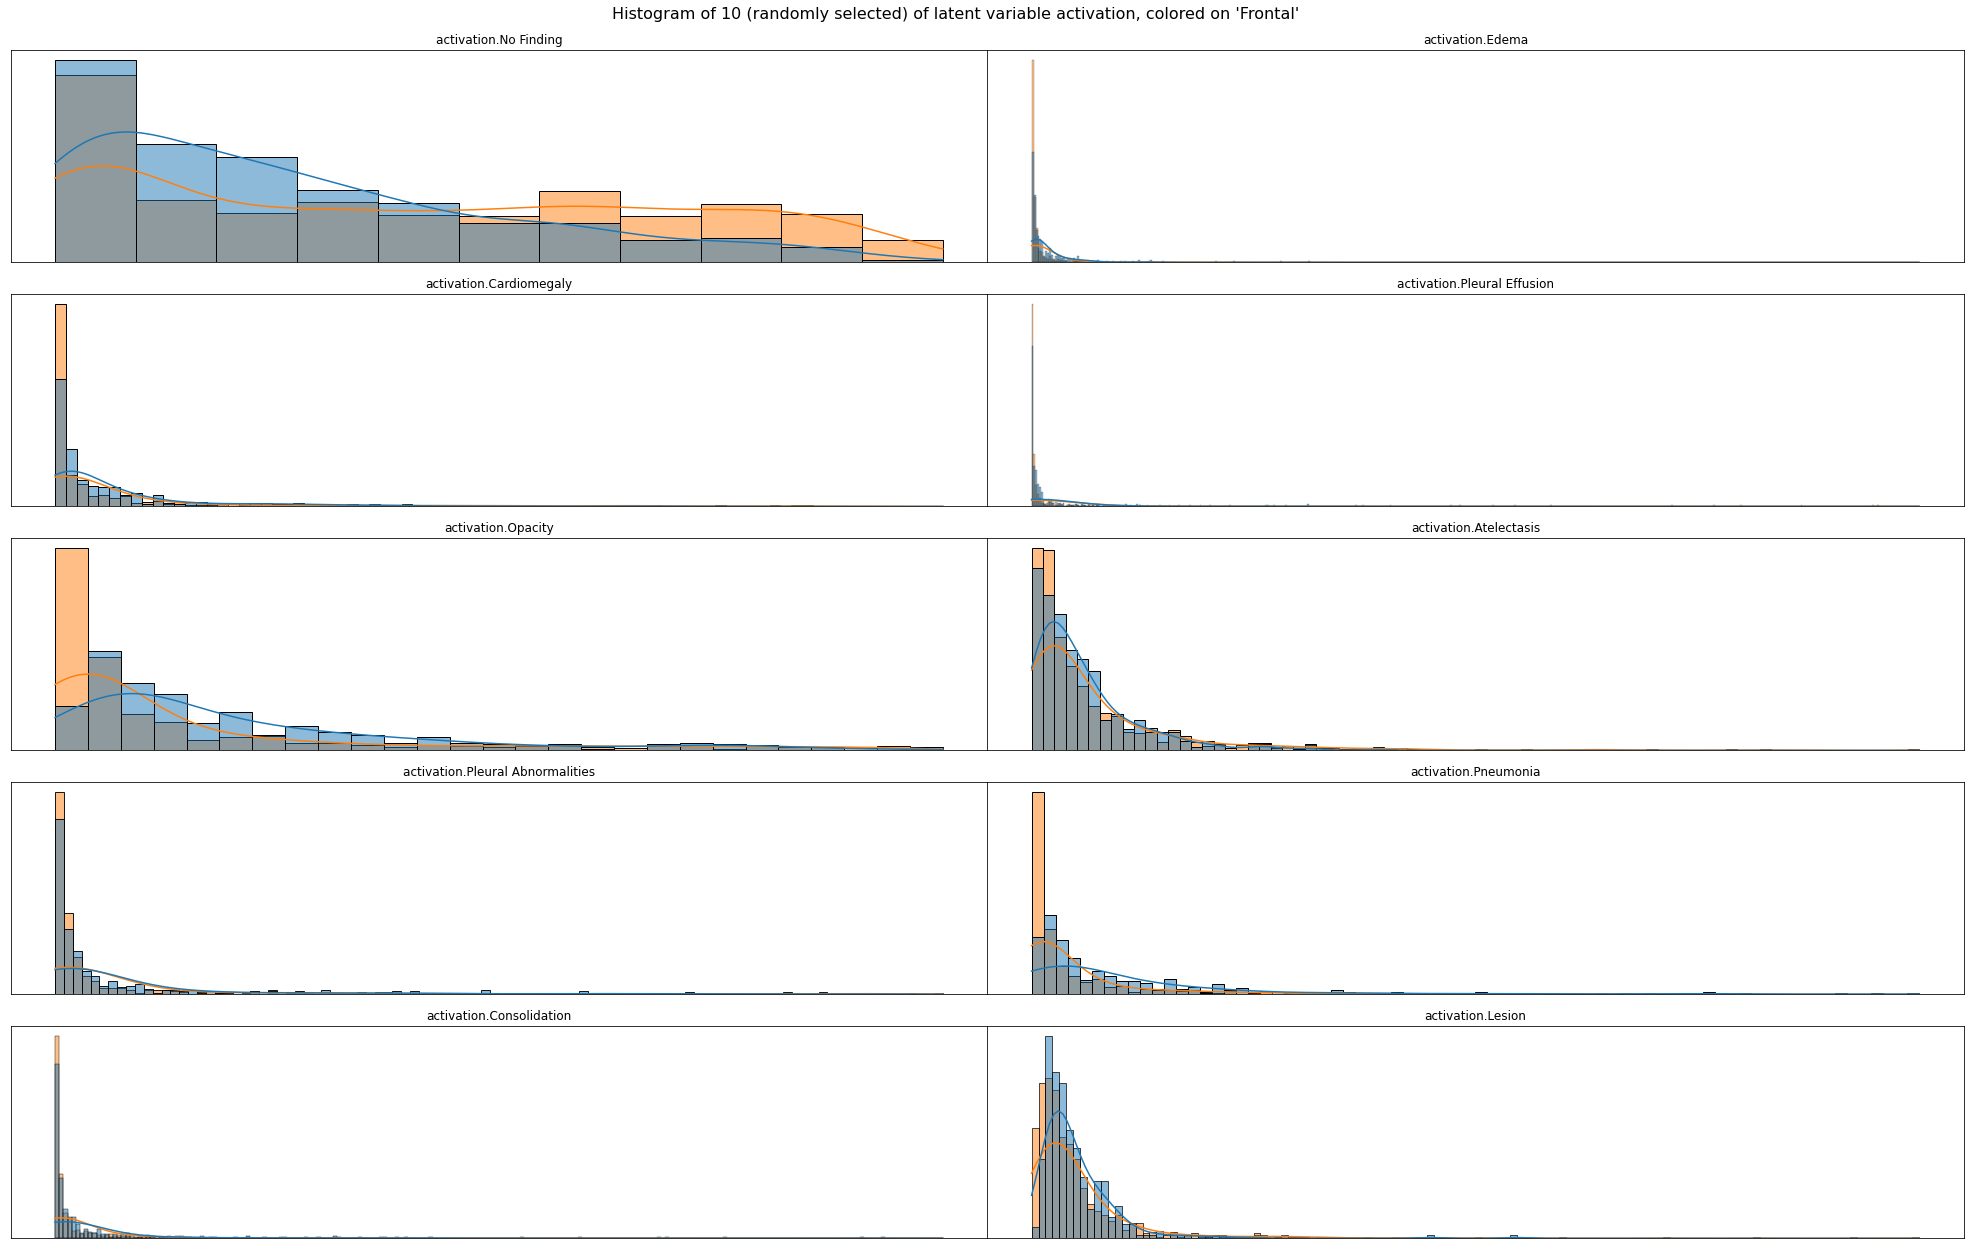

In [9]:
import random
grid_size = (5, 2)
figsize = [35, 20]
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=figsize, gridspec_kw={'wspace':0, 'hspace':.15})
fig.set_facecolor('w')
axes = axes.flatten()
i_vals = list(range(np.prod(grid_size)))

random.shuffle(i_vals)

i_vals = sorted(i_vals[:len(axes)])
col = "activation"
hue = "Frontal"


xdf = pc_df_vae.sample(1000)
s = (f"Histogram of {len(i_vals)} (randomly selected) of latent variable {col}, colored on '{hue}'")
for i, i_val in enumerate(i_vals):
    xcol = f"{col}.{label_cols[i_val]}"
    _ = sns.histplot(data=xdf, x=xcol, hue=hue,  ax=axes[i], common_norm=False, stat='probability', kde=True)
    axes[i].set_title(xcol)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set(ylabel=None, xlabel=None)
    if 1:
        axes[i].get_legend().remove()
        continue
    # axes[i].legend(bbox_to_anchor=(-0.01, -0.2), loc='upper right', ncol=5)

fig.suptitle(s, fontsize=16)
fig.subplots_adjust(top=.95)

In [11]:
pc2 = PadChest(pc_df_vae.reset_index(drop=True),label_map=pc.label_map)
pc2.prepare()

train, val, test = pc2.split(settings.PADCHEST_SPLIT_DATES, studydate_index=True)


In [12]:
val.df.head()

,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,MethodProjection,...,activation.No Finding,activation.Edema,activation.Cardiomegaly,activation.Pleural Effusion,activation.Opacity,activation.Atelectasis,activation.Pleural Abnormalities,activation.Pneumonia,activation.Consolidation,activation.Lesion
StudyDate,,,,,,,,,,,,,,,,,,,,,
2013-01-03,216840111366964013534861372972012363093754576_...,12,20130103,216840111366964013534861372972012363093754576,148551988433106021750421341751298766195,1946-01-01,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0.694785,5.724824e-06,0.000686,0.000794,0.016758,0.038866,0.009606,0.003684,0.000369,0.015896
2013-01-29,216840111366964013590140476722013028085042132_...,12,20130129,216840111366964013590140476722013028085042132,325898852425664233544402536366505063762,1949-01-01,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0.575055,8.926358e-05,0.010861,0.001107,0.075346,0.035188,0.008564,0.013008,0.002145,0.015180
2013-01-03,216840111366964013534861372972013003091239486_...,12,20130103,216840111366964013534861372972013003091239486,156246905057271537278546747240301254084,1938-01-01,F,NaN,AP_horizontal,Manual review of DICOM fields,...,0.000658,6.042935e-07,0.009827,0.486710,0.786650,0.106061,0.546208,0.294359,0.083460,0.001320
2013-01-03,216840111366964013534861372972013003114823894_...,12,20130103,216840111366964013534861372972013003114823894,147170211769438751516338138972656289705,1949-01-01,F,LATERAL,L,Manual review of DICOM fields,...,0.001582,4.201451e-06,0.084821,0.003698,0.114106,0.034022,0.007786,0.026872,0.001752,0.008962
2013-01-03,216840111366964013534861372972012353101437554_...,12,20130103,216840111366964013534861372972012353101437554,249310312162440485428526052490757202930,1960-01-01,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0.738751,1.010338e-05,0.001362,0.000256,0.010457,0.008993,0.001397,0.005098,0.000255,0.007039


In [14]:
from model_drift.drift.tabular import TabularDriftCalculator
from model_drift.drift.numeric import KSDriftCalculator

dwc = TabularDriftCalculator(val.df.reset_index(drop=True))

for i in range(10):
    dwc.add_drift_stat(f'activation.{label_cols[i]}', KSDriftCalculator)
dwc.prepare()

dwc._metric_collections
results, data = dwc.drilldown(test.df, ["2017-01-05"])

results

2017-01-05
activation.No Finding            ks distance        9.090044e-02
                                    pval            5.055594e-06
                                    critical_value  4.396364e-02
                                    critical_diff   4.693681e-02
activation.Edema                 ks distance        6.834304e-02
                                    pval            1.363605e-03
                                    critical_value  4.396364e-02
                                    critical_diff   2.437941e-02
activation.Cardiomegaly          ks distance        1.181569e-01
                                    pval            6.950999e-10
                                    critical_value  4.396364e-02
                                    critical_diff   7.419322e-02
activation.Pleural Effusion      ks distance        5.149835e-02
                                    pval            3.164480e-02
                                    critical_value  4.396364e-02
                                    critical_diff   7.534712e-03
activation.Opacity               ks distance        1.223160e-01
                                    pval            1.456741e-10
                                    critical_value  4.396364e-02
                                    critical_diff   7.835235e-02
activation.Atelectasis           ks distance        9.006219e-02
                                    pval            6.404330e-06
                                    critical_value  4.396364e-02
                                    critical_diff   4.609855e-02
activation.Pleural Abnormalities ks distance        8.043065e-02
                                    pval            8.278666e-05
                                    critical_value  4.396364e-02
                                    critical_diff   3.646701e-02
activation.Pneumonia             ks distance        1.932899e-01
                                    pval            7.743084e-26
                                    critical_value  4.396364e-02
                                    critical_diff   1.493263e-01
activation.Consolidation         ks distance        1.849890e-01
                                    pval            1.094339e-23
                                    critical_value  4.396364e-02
                                    critical_diff   1.410253e-01
activation.Lesion                ks distance        8.961496e-02
                                    pval            7.259001e-06
                                    critical_value  4.396364e-02
                                    critical_diff   4.565132e-02
count                                               8.030000e+02

In [15]:
output = dwc.rolling_window_predict(test.df, stride='D')
output

100%|██████████| 1417/1417 [00:55<00:00, 25.70it/s]


activation.Atelectasis                                         \
                               ks                                          
                    critical_diff critical_value  distance          pval   
2014-01-01              -0.168036       0.706637  0.538600  2.494560e-01   
2014-01-02              -0.022447       0.353390  0.330943  1.132992e-01   
2014-01-03               0.106513       0.280890  0.387403  4.456675e-03   
2014-01-04               0.106513       0.280890  0.387403  4.456675e-03   
2014-01-05               0.106513       0.280890  0.387403  4.456675e-03   
...                           ...            ...       ...           ...   
2017-11-13               0.050332       0.039082  0.089414  2.832593e-07   
2017-11-14               0.052820       0.038513  0.091333  8.802099e-08   
2017-11-15               0.052215       0.037788  0.090004  7.625022e-08   
2017-11-16               0.059550       0.038019  0.097569  4.897570e-09   
2017-11-17               0.062742       0.038340  0.101082  1.619977e-09   

           activation.Cardiomegaly                                         \
                                ks                                          
                     critical_diff critical_value  distance          pval   
2014-01-01               -0.200594       0.706637  0.506043  3.193809e-01   
2014-01-02               -0.059288       0.353390  0.294102  2.050083e-01   
2014-01-03               -0.133680       0.280890  0.147210  7.515931e-01   
2014-01-04               -0.133680       0.280890  0.147210  7.515931e-01   
2014-01-05               -0.133680       0.280890  0.147210  7.515931e-01   
...                            ...            ...       ...           ...   
2017-11-13                0.132712       0.039082  0.171794  8.735992e-26   
2017-11-14                0.134013       0.038513  0.172525  9.307971e-27   
2017-11-15                0.136136       0.037788  0.173924  3.206201e-28   
2017-11-16                0.142693       0.038019  0.180712  4.477406e-30   
2017-11-17                0.138091       0.038340  0.176432  3.239353e-28   

           activation.Consolidation                 ...  \
                                 ks                 ...   
                      critical_diff critical_value  ...   
2014-01-01                -0.118163       0.706637  ...   
2014-01-02                 0.068417       0.353390  ...   
2014-01-03                 0.097057       0.280890  ...   
2014-01-04                 0.097057       0.280890  ...   
2014-01-05                 0.097057       0.280890  ...   
...                             ...            ...  ...   
2017-11-13                 0.124420       0.039082  ...   
2017-11-14                 0.124833       0.038513  ...   
2017-11-15                 0.124198       0.037788  ...   
2017-11-16                 0.120161       0.038019  ...   
2017-11-17                 0.119867       0.038340  ...   

           activation.Pleural Abnormalities activation.Pleural Effusion  \
                                         ks                          ks   
                                       pval               critical_diff   
2014-01-01                     6.685592e-01                   -0.251866   
2014-01-02                     5.695943e-02                   -0.023033   
2014-01-03                     1.133224e-02                   -0.077726   
2014-01-04                     1.133224e-02                   -0.077726   
2014-01-05                     1.133224e-02                   -0.077726   
...                                     ...                         ...   
2017-11-13                     1.612286e-11                    0.080006   
2017-11-14                     1.165966e-11                    0.082162   
2017-11-15                     3.027122e-12                    0.083207   
2017-11-16                     1.462469e-13                    0.089454   
2017-11-17                     4.936491e-14                    0.

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

N = 10
fig = make_subplots (rows=2, cols=1,shared_xaxes=True, vertical_spacing = 0.05)
graph_view = output.swaplevel(0,-1, axis=1, )
g = graph_view['critical_diff']['ks']
for c in list(g.columns.to_flat_index()):
    y = g[c].rolling(N).mean()
    # fig.add_trace(go.Line(x=a.index, y=a[c], 
    # customdata=a.values,
    # hovertemplate="<br />".join([f"{c}: %{{customdata[{i}]:d}}" for i, c in enumerate(a)]),
    # name=c), row=1, col=1)

    fig.add_trace(go.Line(x=g.index, y=y, legendgroup=c,
    # customdata=output_swap[c][hcols].values,
    # hovertemplate='distance: %{customdata[0]:.3f}, p_val: %{customdata[3]:.3f}, is_drift:%{customdata[1]:d}, nobs: %{customdata[2]:d}',
    name=c.split('.')[-1]), 
    row=1, col=1)

g = graph_view['pval']['ks']
for c in list(g.columns.to_flat_index()):
    y = g[c].rolling(N).mean()
    # fig.add_trace(go.Line(x=a.index, y=a[c], 
    # customdata=a.values,
    # hovertemplate="<br />".join([f"{c}: %{{customdata[{i}]:d}}" for i, c in enumerate(a)]),
    # name=c), row=1, col=1)

    fig.add_trace(go.Line(x=g.index, y=y, showlegend=False,
    legendgroup=c,
    # customdata=output_swap[c][hcols].values,
    # hovertemplate='distance: %{customdata[0]:.3f}, p_val: %{customdata[3]:.3f}, is_drift:%{customdata[1]:d}, nobs: %{customdata[2]:d}',
    name=c.split('.')[-1]), 
    row=2, col=1)

fig.update_layout(title = "Activation, Critical diff and P Value")
fig.update_layout(hovermode="x unified")
fig.update_layout(height=600)
fig.show()

D:\Code\MLOpsDay2\MedImaging-ModelDriftMonitoring\.venv\lib\site-packages\plotly\graph_objs\_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

N = 10
fig = make_subplots (rows=1, cols=1,shared_xaxes=True, vertical_spacing = 0.05)
graph_view = output.swaplevel(0,-1, axis=1, )
g = graph_view['critical_diff']['ks']
y = (g >0).mean(axis=1)
y = y.rolling(N).mean()
# fig.add_trace(go.Line(x=a.index, y=a[c], 
# customdata=a.values,
# hovertemplate="<br />".join([f"{c}: %{{customdata[{i}]:d}}" for i, c in enumerate(a)]),
# name=c), row=1, col=1)

fig.add_trace(go.Line(x=g.index, y=y, 
# customdata=output_swap[c][hcols].values,
# hovertemplate='distance: %{customdata[0]:.3f}, p_val: %{customdata[3]:.3f}, is_drift:%{customdata[1]:d}, nobs: %{customdata[2]:d}',
name="Merged"), 
row=1, col=1)

# g = graph_view['pval']['ks']
# for c in list(g.columns.to_flat_index()):
#     y = g[c].rolling(N).mean()
#     # fig.add_trace(go.Line(x=a.index, y=a[c], 
#     # customdata=a.values,
#     # hovertemplate="<br />".join([f"{c}: %{{customdata[{i}]:d}}" for i, c in enumerate(a)]),
#     # name=c), row=1, col=1)

#     fig.add_trace(go.Line(x=g.index, y=y, showlegend=False,
#     # customdata=output_swap[c][hcols].values,
#     # hovertemplate='distance: %{customdata[0]:.3f}, p_val: %{customdata[3]:.3f}, is_drift:%{customdata[1]:d}, nobs: %{customdata[2]:d}',
#     name=str(c)), 
#     row=2, col=1)

fig.update_layout(title = "Average Drift Across Scores")
fig.update_layout(hovermode="x unified")
fig.update_layout(height=600)
fig.show()

D:\Code\MLOpsDay2\MedImaging-ModelDriftMonitoring\.venv\lib\site-packages\plotly\graph_objs\_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
from model_drift.stats import calc_p_real


ref = pc_df_vae.query("View == 'Frontal'")
target = pc_df_vae.query("View != 'Frontal'")
pvals = []
for i_val in range(128):
    xcol = f"mu.{i_val}"a
    samp1 = ref[xcol].values
    samp2 = target[xcol].values
    ks, p = ks_2samp(samp1, samp2)
    if ks>0.5:
        p = 1-p
    pvals.append(ks)
    # axes[i].legend(bbox_to_anchor=(-0.01, -0.2), loc='upper right', ncol=5)